In [1]:
# Required Packages

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

%matplotlib inline

# Movie Recommendation System

* [Data](#Data)
    * [Movie Ratings](#Movie-Ratings)
    * [Movie titles and their IDs](#Movie-titles-and-their-IDs)
* [Data Analysis](#Data-Analysis)
* [Conclusions and Movie Recommendations](#Conclusions-and-Movie-Recommendations)

In this article, a recommender system is developed that suggests similar movies based on available data.

## Data

There are two sets of data that we will be using in this article.

### Movie Ratings

In [2]:
#Reading the movie ratings dataset.
movie_ratings_df = pd.read_csv('Data/movie_ratings.csv', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])

In [3]:
movie_ratings_df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


### Movie titles and their IDs

Reading the movie titles and their IDs

In [4]:
movie_titles_df = pd.read_csv("Data/movie_id_titles.csv")
movie_titles_df.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


Merging the the two dataframes:

In [5]:
df = pd.merge(movie_ratings_df, movie_titles_df,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


## Data Analysis

Exploring the data to identify at some of the best-rated movies. In doing so, the data frame can be grouped by **movie titles** and their **ratings**. It follows that,

In [6]:
Ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
Ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


Setting the number of ratings column:

In [7]:
Ratings['Number of Ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
Ratings = Ratings.rename(columns={"rating": "Rating Ave"}, errors="raise")
Ratings.index.names = ['Title']
Ratings.sort_values(by=['Number of Ratings'],ascending=False).head()

,Rating Ave,Number of Ratings
Title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


Visualizing the number of ratings:

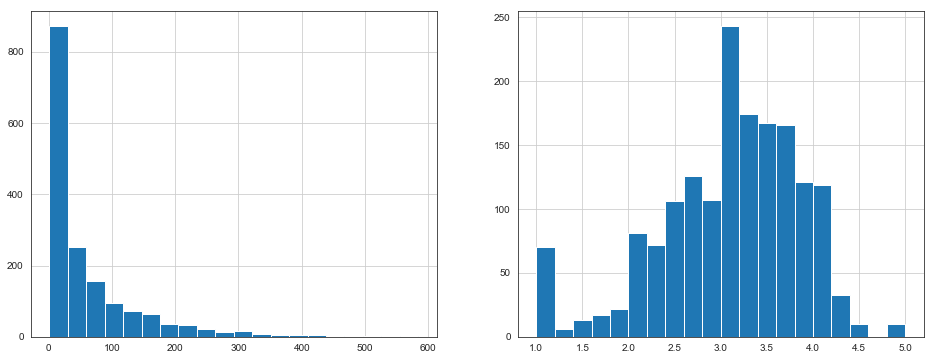

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharex=False)
Ratings['Number of Ratings'].hist(bins=20,ax=axes[0])
Ratings['Rating Ave'].hist(bins=20,ax=axes[1])

## Recommending Similar Movies

The next step is to create a martix that has the user ids on one axis and the movie titles on another. Each cell will then consist of the rating of a movie by a particular user

In [9]:
Movie_Matrix = df.pivot_table(index='user_id',columns='title',values='rating')
Movie_Matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Since users have not watched all movies (only some movies), some of these values appear as **<font color='Blue'>NaN</font>**.

Checking out the top ten movies that have a rating greater than 4.0 and have the most rated numbers.

In [10]:
Top_Ten=Ratings[Ratings['Rating Ave'] > 4.0].sort_values('Number of Ratings',ascending=False).head(10)
Top_Ten_list=list(Top_Ten.index) 
Top_Ten

,Rating Ave,Number of Ratings
Title,,
Star Wars (1977),4.359589,584
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Raiders of the Lost Ark (1981),4.252381,420
"Godfather, The (1972)",4.283293,413
Pulp Fiction (1994),4.060914,394
"Silence of the Lambs, The (1991)",4.289744,390
"Empire Strikes Back, The (1980)",4.206522,368
Titanic (1997),4.245714,350


Now, let's choose the top three from the above table. We have,

In [11]:
Top_Ten_list[0:3]

['Star Wars (1977)', 'Fargo (1996)', 'Return of the Jedi (1983)']

Now let's grab the user ratings for those two movies:

In [12]:
df_First = Movie_Matrix[Top_Ten_list[0]]
df_Second = Movie_Matrix[Top_Ten_list[1]]
df_Third = Movie_Matrix[Top_Ten_list[2]]

We can then use corrwith() method to get correlations between two pandas series:

In [14]:
# The first movie from the the top-ten list
similar_to_df_First = Movie_Matrix.corrwith(df_First)
# The Second movie from the the top-ten list
similar_to_df_Second = Movie_Matrix.corrwith(df_Second)
# The third movie from the the top-ten list
similar_to_df_Third = Movie_Matrix.corrwith(df_Third)

Cleaning the data by removing **<font color='Blue'>Nan</font>** values and using a DataFrame instead.

In [15]:
df_First_corr = pd.DataFrame(similar_to_df_First,columns=['Correlation'])
df_First_corr.dropna(inplace=True)
print('Ten similar movies to "%s":' % Top_Ten_list[0])

Ten similar movies to "Star Wars (1977)":


In [16]:
df_First_corr.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


However, some of these movies only rated by a few users. In caste that we are only interested in movies that have a least 100 reviews. We have,

In [17]:
df_First_corr = df_First_corr.join(Ratings['Number of Ratings'])
df_First_corr.head()

,Correlation,Number of Ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


Now sort the values and notice how the titles make a lot more sense:

In [18]:
df_First_corr[df_First_corr['Number of Ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,Number of Ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


We can come with a similar analysis for any other movies from the list. Therefore, we can summarize the results in the next section.

## Conclusions and Movie Recommendations

Based on the analysis, we can create the following function that recommends four similar movies to a movie that we just watched.

In [40]:
def Movie_Recommendations(Movie):
    df_Movie = Movie_Matrix[Movie]
    Similar_Movies = Movie_Matrix.corrwith(df_Movie)
    Movie_corr = pd.DataFrame(Similar_Movies,columns=['Correlation'])
    Movie_corr = Movie_corr.join(Ratings['Number of Ratings'])
    Move_Rec=Movie_corr[Movie_corr['Number of Ratings']>100].sort_values('Correlation',ascending=False).head(5)
    Move_Rec_list=list(Move_Rec.index)
    return Move_Rec_list[1:]

For example, consider **Star Wars (1977)**. For this movie, the function recommends the following movies

In [44]:
Movie_Recommendations('Star Wars (1977)')

['Empire Strikes Back, The (1980)',
 'Return of the Jedi (1983)',
 'Raiders of the Lost Ark (1981)',
 'Austin Powers: International Man of Mystery (1997)']

Or for **Titanic (1997)** movie, we have

In [45]:
Movie_Recommendations('Titanic (1997)')

['River Wild, The (1994)',
 'Abyss, The (1989)',
 "Bram Stoker's Dracula (1992)",
 'True Lies (1994)']